In [95]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten,Dense,Dropout,BatchNormalization
from tensorflow.keras.layers import Conv1D,MaxPool1D
from tensorflow.keras.optimizers import Adam
from scipy.stats import norm



In [96]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [81]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [82]:
data = pd.read_csv(r'C:\Users\dhrit\projects\Fraud transaction demo\credit card fraud demo\transactions_updated.csv')
data.head()

,cc_num,first,last,trans_num,trans_date,trans_time,unix_time,category,merchant,amt,merch_lat,merch_long,is_fraud,transaction_date
0,1.800940e+14,John,Holland,80f5177be11f0bcd768e06a0b1b294c8,2012-01-01T00:00:00.000+05:30,00:12:15,1325376735,personal_care,Hills-Boyer,64,39.011566,-119.937831,0,2012-01-01
1,4.368590e+15,Carla,Fleming,7933d389bf8ef8a11a8a301da6e6bc6c,2012-01-01T00:00:00.000+05:30,00:16:58,1325377018,gas_transport,Friesen-DAmore,133,40.149071,-75.589697,0,2012-01-01
2,4.361360e+12,Matthew,Nelson,1467c318b5d73d22d6741f575db42f3f,2012-01-01T00:00:00.000+05:30,00:36:42,1325378202,entertainment,Larson-Moen,119,47.297797,-96.819362,0,2012-01-01
3,4.037300e+15,Antonio,Garcia,4a3848719d72daaa32c938ce43e0eb03,2012-01-01T00:00:00.000+05:30,00:37:59,1325378279,shopping_pos,Lynch Ltd,62,40.078781,-102.373954,0,2012-01-01
4,4.515090e+15,Timothy,Silva,02d27e94f279e1013a4c323eb8bb6811,2012-01-01T00:00:00.000+05:30,00:39:18,1325378358,shopping_pos,"Baumbach, Strosin and Nicolas",198,41.549359,-83.044403,0,2012-01-01


In [83]:
data.shape

(13622, 14)

In [84]:
data.isnull().any()

cc_num              False
first               False
last                False
trans_num           False
trans_date          False
trans_time          False
unix_time           False
category            False
merchant            False
amt                 False
merch_lat           False
merch_long          False
is_fraud            False
transaction_date    False
dtype: bool

In [85]:
##mapping category to integers
mymap={'personal_care':0,'gas_transport':1,'entertainment':2,'shopping_pos':3,'health_fitness':4,'grocery_net':5,'travel':6,'misc_net':7,'shopping_net':8,'kids_pets':9,'misc_pos':10,'grocery_pos':11,'food_dining':12,'home':13}
data=data.applymap(lambda s: mymap.get(s) if s in mymap else s)

In [86]:
data["is_fraud"].value_counts()

0    13108
1      514
Name: is_fraud, dtype: int64

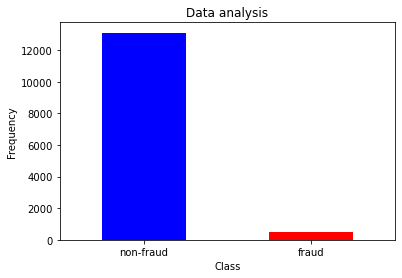

In [87]:
class_name = ["non-fraud", "fraud"]
class_count = pd.value_counts(data["is_fraud"], sort=True)
class_count.plot(kind="bar", rot=0, color=["blue", "red"])
plt.xticks(range(2), class_name)
plt.xlabel("Class")
plt.ylabel("Frequency")
plt.title("Data analysis")
plt.show()

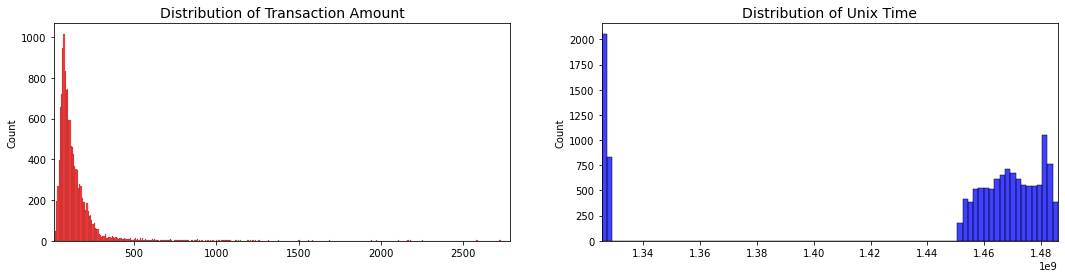

In [88]:
fig, ax = plt.subplots(1, 2, figsize=(18,4))

amount_val = data['amt'].values
time_val = data['unix_time'].values

sns.histplot(amount_val, ax=ax[0], color='r')
ax[0].set_title('Distribution of Transaction Amount', fontsize=14)
ax[0].set_xlim([min(amount_val), max(amount_val)])

sns.histplot(time_val, ax=ax[1], color='b')
ax[1].set_title('Distribution of Unix Time', fontsize=14)
ax[1].set_xlim([min(time_val), max(time_val)])

plt.show()

In [89]:
non_fraud_data=data[data['is_fraud']==0]
fraud_data=data[data['is_fraud']==1]

print("Fraud Data Shape: ", fraud_data.shape)
print("Non-Fraud Data Shape: ", non_fraud_data.shape)

Fraud Data Shape:  (514, 14)
Non-Fraud Data Shape:  (13108, 14)


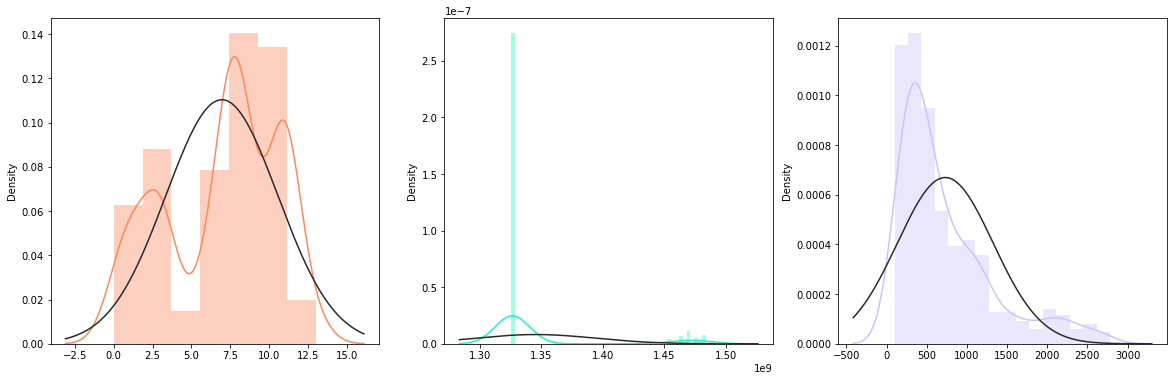

In [90]:
normal_distributed_df = pd.concat([fraud_data, non_fraud_data]).sample(frac=1, random_state=42)

# Distribution plot
# Distribution plot
f, (axes1, axes2, axes3) = plt.subplots(1,3, figsize=(20, 6))

cat_fraud_dist = normal_distributed_df['category'].loc[normal_distributed_df['is_fraud'] == 1].values
sns.distplot(cat_fraud_dist,ax=axes1, fit=norm, color='#FB8861')
ax1.set_title('Category Distribution \n (Fraud Transactions)', fontsize=14)

uni_fraud_dist = normal_distributed_df['unix_time'].loc[normal_distributed_df['is_fraud'] == 1].values
sns.distplot(uni_fraud_dist,ax=axes2, fit=norm, color='#16F9BB')
ax2.set_title('Unix Time Distribution \n (Fraud Transactions)', fontsize=14)


amt_fraud_dist = normal_distributed_df['amt'].loc[normal_distributed_df['is_fraud'] == 1].values
sns.distplot(amt_fraud_dist,ax=axes3, fit=norm, color='#CCC3F9')
ax3.set_title('Amount Distribution \n (Fraud Transactions)', fontsize=14)

plt.show()

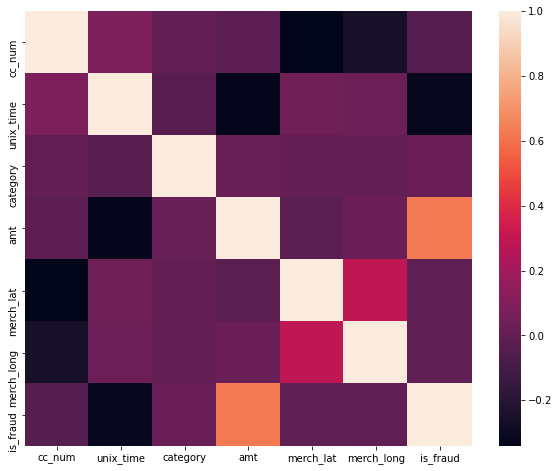

In [91]:
#correlation check
fig = plt.figure(figsize=(10, 8))
sns.heatmap(data.corr())
plt.show()

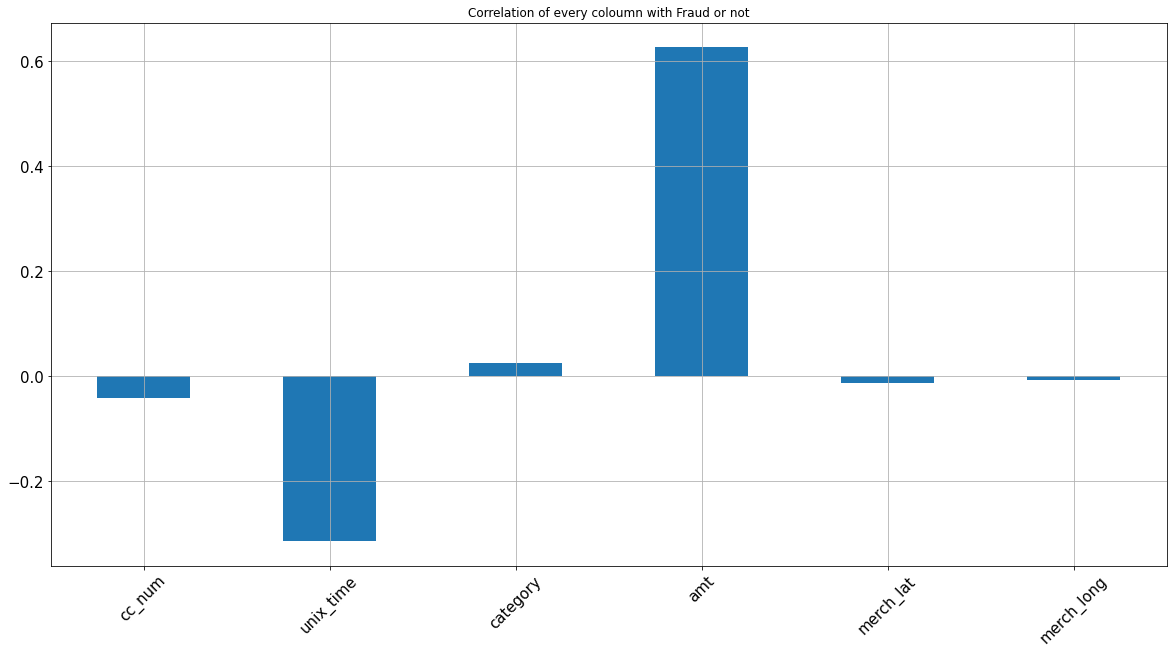

In [92]:
data2 = data.drop(columns = ['is_fraud']) 
data2.corrwith(data.is_fraud).plot.bar(
    figsize=(20,10),title="Correlation of every coloumn with Fraud or not",fontsize=15,
    rot=45,grid=True)
plt.show()

Text(0, 0.5, 'Amount')

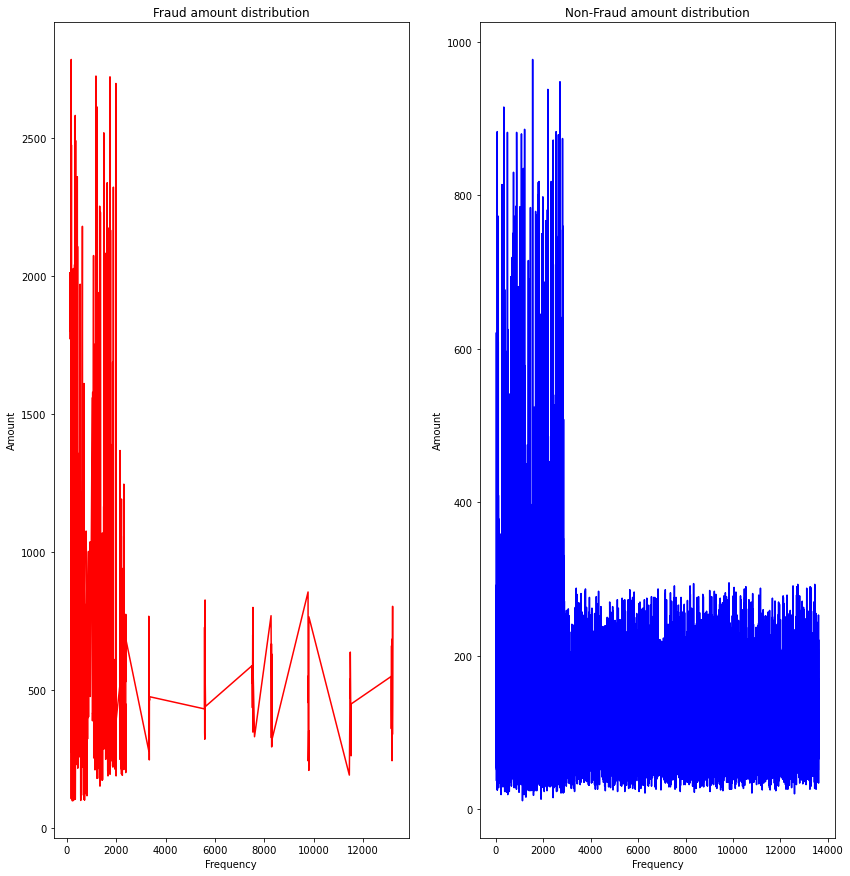

In [93]:
##amnt vs frequency 
graph = plt.figure(figsize=(14,15))

plt.subplot(1,2,1)
plt.plot(fraud_data["amt"],color="red")
plt.title("Fraud amount distribution")
plt.xlabel("Frequency")
plt.ylabel("Amount")

plt.subplot(1,2,2)
plt.plot(non_fraud_data["amt"],color="blue")
plt.title("Non-Fraud amount distribution")
plt.xlabel("Frequency")
plt.ylabel("Amount")

Text(0, 0.5, 'category')

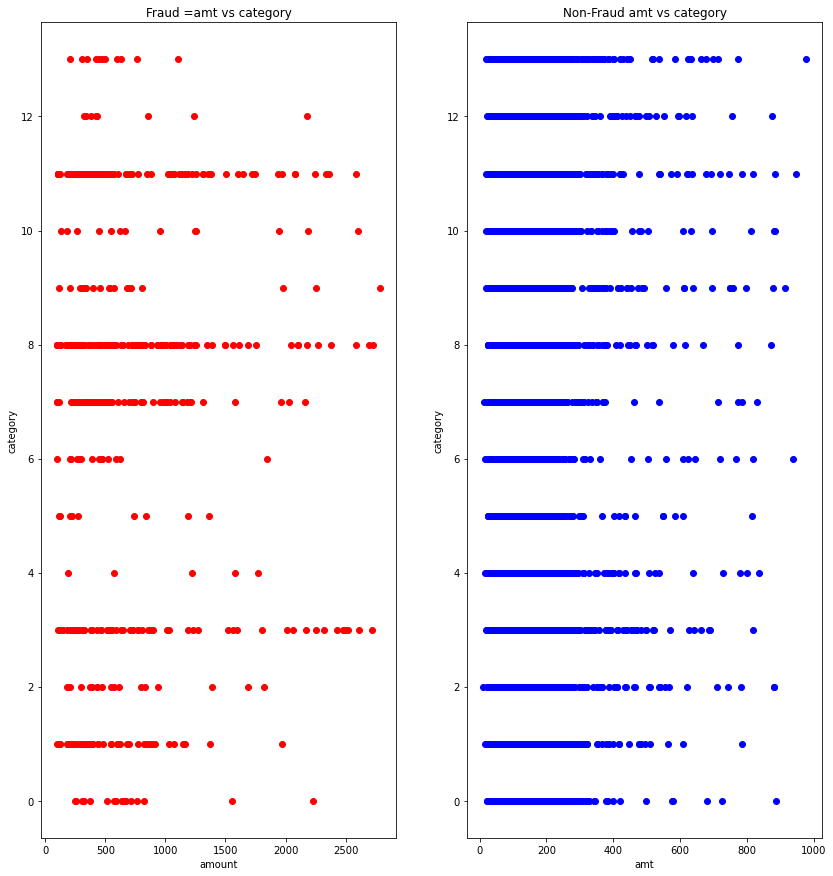

In [94]:
##unix_time vs category

graph = plt.figure(figsize=(14,15))

plt.subplot(1,2,1)
plt.scatter(fraud_data["amt"],fraud_data["category"],color="red")
plt.title("Fraud =amt vs category")
plt.xlabel("amount")
plt.ylabel("category")

plt.subplot(1,2,2)
plt.scatter(non_fraud_data["amt"],non_fraud_data["category"],color="blue")
plt.title("Non-Fraud amt vs category")
plt.xlabel("amt")
plt.ylabel("category")